# Titration Simulator (Weak Acid titrated by Strong Base)

## Solves for Vb given pH

## Instructions:
1.  Fill in values for your weak acid (Ka, concentration, volume)
2.  Fill in values for your strong base (concentration)
3.  Click Calculate Titration

The notebook will iterate through pH values 0 - 14 and caculate the volume of base required to achieve that pH.  Then it will plot the data, which will look like a titration curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

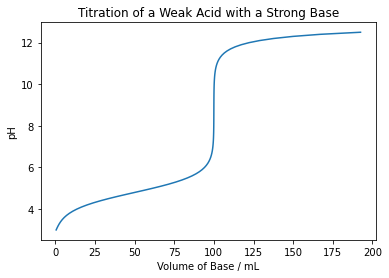

In [2]:
pHs = None
Vbs = None
def calculateVb(pH, pKa, Ca, Va, Cb):
    Ka = np.power(10.0,-pKa)
    
    Kw = 1.00E-14
    Hplus = np.power(10.0,-pH)
    OHminus = Kw / Hplus
    alpha = Ka/(Hplus+Ka)
    phi = (alpha-(Hplus-OHminus)/Ca)/(1+(Hplus-OHminus)/Cb)
    Vb = phi*Ca*Va/Cb
    return Vb

def calculateTitration(pKa, Ca, Va, Cb):
    pHs = np.arange(0,14, 0.1)
    Vbs = calculateVb(pHs, pKa, Ca, Va, Cb)

    maxVb = 2*Ca*Va/Cb

    filter = Vbs < maxVb
    pHs = pHs[filter]
    Vbs = Vbs[filter]

    filter = Vbs > 0
    pHs = pHs[filter]
    Vbs = Vbs[filter]

    
    fig, ax = plt.subplots()
    plt.title ("Titration of a Weak Acid with a Strong Base")
    plt.xlabel ("Volume of Base / mL")
    plt.ylabel ("pH")
    plt.plot(Vbs,pHs)
    plt.show()

calculateTitration(4.8, 0.1, 100, 0.1)